In [129]:
import numpy as np
from scipy.fft import fft2, ifft2, fftfreq, rfft2, irfft2, rfftfreq
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [ ]:
def sim(parameters):
    # Parameters
    Lx = 1000 # 1000 m
    Ly = 1000 # 1000 m
    v = 343 # m/s
    Nx = 512
    Ny = 512

    x = np.linspace(0, Lx, Nx)
    y = np.linspace(0, Ly, Ny)
    X, Y = np.meshgrid(x,y, indexing='ij')

    psi0 = np.zeros((Nx,Ny), dtype=complex)
    for param in parameters:
        xratio, yratio, An, sn = param
        gaussian = An * np.exp(-((X - xratio*Lx)**2 + (Y - yratio*Ly)**2) / (sn**2))
        psi0 += gaussian

    # plt.figure()
    # plt.imshow(np.real(psi0).T, extent=[0, Lx, 0, Ly], origin='lower') #x and y swapped for correct orientation
    # plt.axis('equal')
    # #plt.set_cmap('gray')
    # plt.set_cmap('hot')
    # #plt.set_cmap('viridis')
    # plt.colorbar()
    # plt.title('Initial displacement @ t=0')
    # plt.xlabel('x (m)')
    # plt.ylabel('y (m)')
    # plt.show()
    # #plt.savefig('InitDisplacement.png', dpi=300)

    ##############################################################

    kx = fftfreq(Nx, d=Lx/Nx) * 2 * np.pi # 2D frequency vector
    ky = fftfreq(Ny, d=Ly/Ny) * 2 * np.pi
    KX, KY = np.meshgrid(kx, ky, indexing='ij')
    dij = fft2(psi0) # 2D FFT of initial displacement
    tvals = [0.0, 0.2, 0.4, 0.8] # seconds
    K = np.sqrt(KX**2 + KY**2) # magnitude for cosine term

    
    for t in tvals:
        res = ifft2(dij*np.cos(v*K*t)) # invesrt FFT to get back to spatial domain
        plt.figure()
        plt.imshow(np.real(res).T, extent=[0, Lx, 0, Ly], origin='lower') #x and y swapped for correct orientation
        plt.axis('equal')
        #plt.set_cmap('gray')
        plt.set_cmap('hot')
        #plt.set_cmap('viridis')
        plt.colorbar()
        plt.title(f'2D Wave Equation For Psi @ t={t}')
        plt.xlabel('x (m)')
        plt.ylabel('y (m)')
        plt.show()
        #plt.savefig(f'InitDisplacement_{t}.png', dpi=300)

    # Animation 
    fig = plt.figure()
    img = plt.imshow(np.real(psi0).T, extent=[0, Lx, 0, Ly], origin='lower', cmap='hot') #initial frame
    plt.axis('equal')
    plt.colorbar()
    
    def update(i):
        t = i * 0.05 # 5 seconds total (0.05s per frame x 100 frames)
        res = ifft2(dij*np.cos(v*K*t)) 
        img.set_array(np.real(res).T)
        plt.title(f'2D Wave Equation For Psi @ t={t:.2f}s')
        return [img]

    gif = FuncAnimation(fig, update, frames=100, interval=50, blit=True)
    gif.save('2DWaveEquation.gif', dpi=300, writer='imagemagick')
    plt.show()


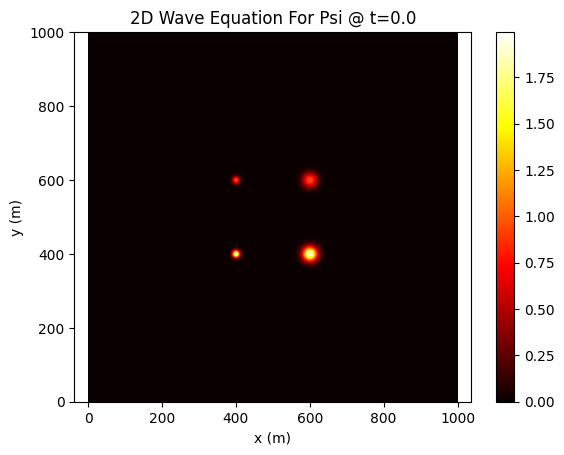

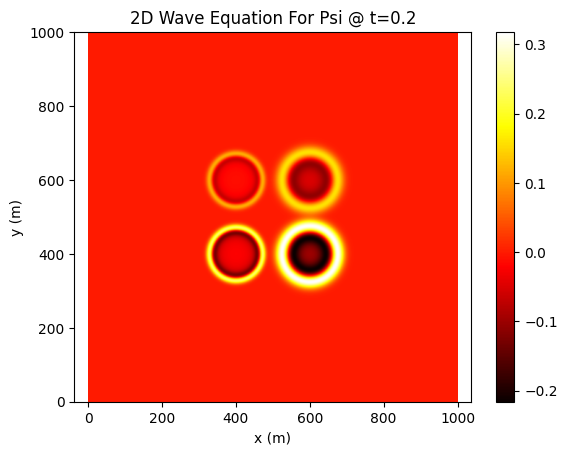

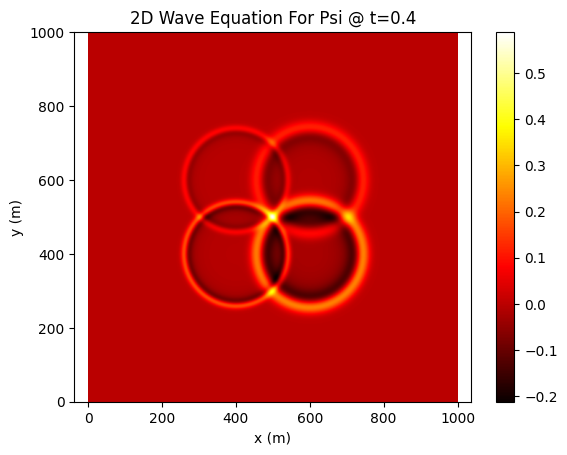

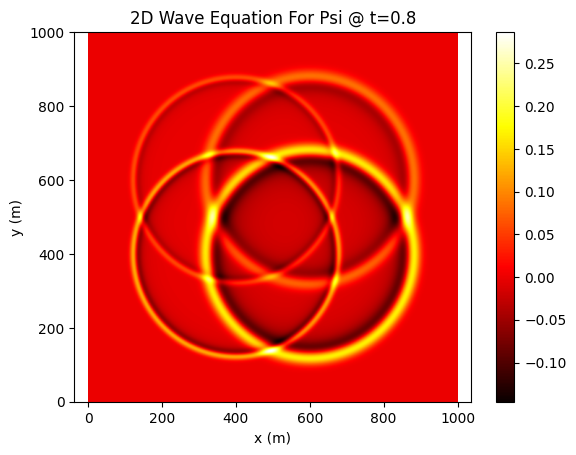

MovieWriter imagemagick unavailable; using Pillow instead.


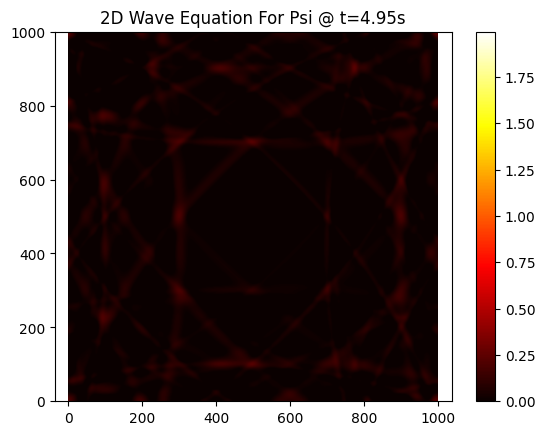

In [131]:
parameters = [[0.4, 0.4, 2, 10], # xn/Lx , yn/Ly , An, sn
              [0.6, 0.4, 2, 20],
              [0.4, 0.6, 1, 10],
              [0.6, 0.6, 1, 20]]

sim(parameters)


